In [3]:
##  Load the Titanic Dataset
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')

# Convert categorical features to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Train a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())



Accuracy: 0.7757847533632287
Confusion Matrix:
 [[108  26]
 [ 24  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       134
           1       0.71      0.73      0.72        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

Cross-Validation Scores: [0.77653631 0.80898876 0.84269663 0.76966292 0.84831461]
Mean CV Accuracy: 0.8092398468394952


In [ ]:
Model	                     Type	                    Strengths	                          Weaknesses                       	Accuracy (Example)
Logistic Regression (LR)	 Linear Model	           - Simple, fast                       - Struggles with non-linear data    ~78–80% (varies)
                                                       - Good for linear relationships
                                                       - Interpretable	                     
Decision Tree (DT)	         Tree-Based	               - Easy to visualize                  - Prone to overfitting             ~75–78% (varies)
                                                       - Handles non-linear data            - Sensitive to small data changes
                                                       - No scaling needed	                
                                                                                                 	
Random Forest (RF)	         Ensemble (Bagging)	       - More accurate than DT              - Slower than DT                   ~80–85% (varies)
                                                       - Less overfitting                   - Less interpretable than LR or a single tree
                                                       - Handles missing values	



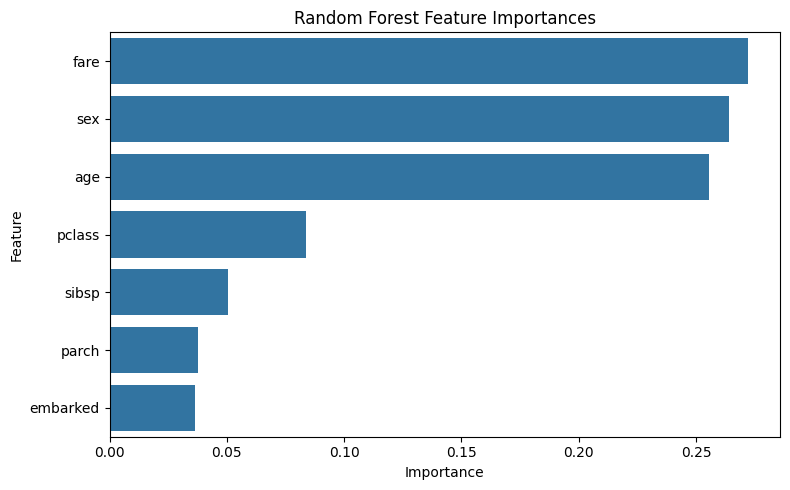

In [10]:

## .feature_importances_ with Random Forest## 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = sns.load_dataset('titanic')

# Convert categorical features to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Train a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = rf.predict(X_test)


from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5)

important = rf.feature_importances_
features_names = X.columns

# Create a DataFrame for easy plotting
feat_imp = pd.DataFrame({'Feature': features_names, 'Importance': important}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()